# Team Members


| Id        | Student                     |
|-----------|-----------------------------|
| A01795654 | Raul Astorga Castro         |
| A01795579 | Edson Misael Astorga Castro |
|           |                             |
|           |                             |
|           |                             |



# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


# Import files and libraries required for the model training

## Libraries

In [1]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


## Loading files with training and validation datasets


In [2]:
DATA_PATH = '/content/'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [3]:
# Printing a sample of 5 records from the training dataset
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Preparing matrices with data to train and validate

In [4]:
# Extracting vector of labels (letters in numeric format)
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])

# Remove label column from matrices
del train_df['label']
del valid_df['label']

# Convert pixel values ​​to numpy float32 format
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

# Printing data type and samples for verification
print(type(x_val))
print(x_train)

<class 'numpy.ndarray'>
[[107. 118. 127. ... 204. 203. 202.]
 [155. 157. 156. ... 103. 135. 149.]
 [187. 188. 188. ... 195. 194. 195.]
 ...
 [174. 174. 174. ... 202. 200. 200.]
 [177. 181. 184. ...  64.  87.  93.]
 [179. 180. 180. ... 205. 209. 215.]]


In [5]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Splits a dataset into validation and test sets.

    Args:
    x (array-like): Features or input data.
    y (array-like): Labels or target data.
    pct (float, optional): Proportion of the data to be assigned to the test set.
                           Defaults to 0.5 (i.e., 50% for validation and 50% for test).
    shuffle (bool, optional): Indicates whether to shuffle the data before splitting.
                              Defaults to True.

    Returns:
    tuple: Validation and test sets for both features (x) and labels (y).
    '''
    x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=pct, shuffle=shuffle)
    return (x_val, x_test, y_val, y_test)

In [6]:
# The validation matrix is split into validation and test datasets with a default margin of 50%.
x_val, x_test, y_val, y_test = split_val_test(x_val, y_val, 0.5)

In [7]:
# A list is created with the English alphabet
alphabet=list(string.ascii_lowercase)

# Letters with movement are removed from the alphabet list
alphabet.remove('j')
alphabet.remove('z')

# The total size of the alphabet list without the 2 removed letters is printed
print(len(alphabet))

24


### Normalise

In [8]:
def normalise(x_mean, x_std, x_data):
    """
    This function applies z-score normalization to the data by subtracting the mean
    and dividing by the standard deviation, which scales the data to have a zero mean
    and a standard deviation of one.

    Args:
    x_mean (array-like): Mean of each feature.
    x_std (array-like): Standard deviation of each feature.
    x_data (array-like): Data to be normalized.

    Returns:
    array-like: Normalized data.
    """
    return (x_data - x_mean) / x_std

In [9]:
# The mean and standard deviation of the training dataset are calculated
x_mean = x_train.mean()
x_std = x_train.std()

# The training, validation, and test datasets are normalized
x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [10]:
# Printing mean and standard deviation for verification
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

### Plot samples

In [11]:
def plot_letter(image):
    """
    Displays a 28x28 pixel grayscale image

    Args:
    image (array-like): 28x28 pixel image to display

    Returns:
    None. Displays the image in a graphical window
    """
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

The sample image represent letter: o


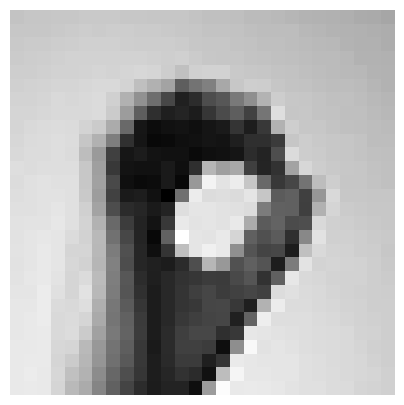

In [12]:
# A random index is generated between 0 and the total number of elements in the dataset
rnd_idx = np.random.randint(len(y_test))

# The pixel values are extracted (columns from pixel1 to pixel784)
image_pixels = x_test[rnd_idx]
# The vector of pixels is reshaped into a 28x28 matrix
image_reshaped = image_pixels.reshape(28, 28)

# The letter corresponding to the randomly selected image is retrieved using the same index
letter = alphabet[y_test[rnd_idx]]
# The selected letter and image are printed
print(f'The sample image represent letter: {letter}')
plot_letter(image_reshaped)

### Equations for our model


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

# Additional functions

#### Mini batches

In [13]:
#This function receives three parameters, leaving shuffle as True
def create_minibatches(mb_size, x, y, shuffle = True):
    #First it uses two parameters x and y to check if the 0 dimensions of the matrices x and y are equal
    assert x.shape[0] == y.shape[0], 'Error sample length'
    #The row dimension of x is saved
    total_data = x.shape[0]
    # It is verified if this function is activated to randomly share data from the batch created previously
    if shuffle:
        # An array of size total_data is created, that is, the number of rows of x
        idxs = np.arange(total_data)
        # A random number is taken from 0 to the size of x
        np.random.shuffle(idxs)
        # The values ​​that were in x and y are loaded into x and y from their index
        x = x[idxs]
        y = y[idxs]
    # Returns the array of randomly chosen images with their labels
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

In [14]:
class np_tensor(np.ndarray):
    """
    This class inherits directly from np.ndarray, allowing you to create custom tensors
    with all the properties and methods of the NumPy array.
    """
    pass

## Our Linear, ReLU and Sequential classes

###  Linear Class

[![](linear.jpeg)](linear.jpeg "Linear Class")

> Example of operations performed within a Linear Class

In [15]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
          Initializes the parameters W (weights) and b (bias) using Kaiming He initialization,
          which is appropriate for deep networks with ReLU activations

          Args:
          input_size (int): Input dimension
          output_size (int): Output dimension

          W (np_tensor): Weight matrix, of size (output_size, input_size)
          b (np_tensor): Bias vector, of size (output_size, 1)
        '''
        # Random values ​​are assigned to the weights
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        # Zero values ​​are assigned to all neuron biases
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    # This class will be called automatically when the Linear class is called
    def __call__(self, X):
        '''
        Performs the forward operation on a linear layer

        Args:
        X (np_tensor): Input of the layer, of size (input_size, n_samples)

        Returns:
        np_tensor: The result of the linear operation Z = W @ X + b
        '''
        # This operation will be performed and will be the output result of each neuron
        Z = self.W @ X + self.b
        return Z

    def backward(self, X, Z):
        '''
        Calculates the gradients of the parameters W, b and X during backpropagation

        Args:
        X (np_tensor): Input of the layer.
        Z (np_tensor): Output of the layer (resulting from the forward operation)
        '''

        X.grad = self.W.T @ Z.grad # Gradient with respect to the input
        self.W.grad = Z.grad @ X.T  # Gradient with respect to the weights W
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True) # Gradient with respect to the bias b


### ReLU Class

[![](relu.jpeg)](relu.jpeg "ReLU Class")

> Graphical representation of the output of the ReLU Class

In [16]:
class ReLU():
    def __call__(self, Z):
        '''
        Applies the ReLU (Rectified Linear Unit) activation function, which returns
        the maximum value between 0 and the input value

        Args:
        Z (np_tensor): Input to the activation function

        Returns:
        np_tensor: Output activated by ReLU (negative values ​​are replaced by 0)
        '''
        return np.maximum(0, Z)

    def backward(self, Z, A):
        '''
        Calculates the gradient of the ReLU function during backpropagation

        Args:
        Z (np_tensor): Original input before activation
        A (np_tensor): Activated output
        '''
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0


### Sequential Class

[![](sequential.jpeg)](sequential.jpeg "Sequential Class")

> Representation of connection between the layers of a Sequential Neural Network

In [17]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        Initializes the model's layer sequence

        Args:
        layers (list): List of layers, including instances of the Linear and ReLU classes
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}

    def __call__(self, X):
        '''
        Execute the forward pass through all layers of the model

        Args:
        X (np_tensor): Initial input to the model

        Returns:
        np_tensor: Final output after passing through all layers
        '''
        self.x = X # The input x is assigned to the attribute self
        self.outputs['l0'] = self.x # It is stored in the following dictionary with the key l0 to store the input elements
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)  # The data of each layer of self.x is temporarily saved in self.x
            self.outputs['l'+str(i)]=self.x  # The elements of each iteration are saved in the outputs dictionary
        return self.x  # The last value of self.x is returned

    def backward(self):
        '''
        Performs backward pass through all layers
        Calculates the gradients of each layer in reverse order
        '''
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])

    def update(self, learning_rate = 1e-3):
        '''
        Updates parameters (weights and bias) of linear layers using gradient descent

        Args:
        learning_rate (float): Learning rate for parameter update
        '''
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        '''
        Makes a prediction by passing data through the model

        Args:
        X (np_tensor): Input data

        Returns:
        int: Index of the predicted class (the one with the highest probability)
        '''
        return np.argmax(self.__call__(X))

### Cost Function

[![](softmax.jpeg)](softmax.jpeg "Softmax Class")

> Example of connection between Layers and the Softmax function

In [18]:
def softmaxXEntropy(x, y):
    """
    Computes the softmax cross-entropy cost and corresponding gradients

    Args:
    x (np_tensor): Model output (class scores), of size (n_classes, batch_size)
    y (np_tensor): True labels (classes) of size (1, batch_size)

    Returns:
    tuple:
        preds (np_tensor): Predicted probabilities after applying softmax
        cost (float): Cross-entropy cost
    """

    batch_size = x.shape[1] # The size of the vectors is received, i.e. the columns in x
    exp_scores = np.exp(x) # The exponentials of x are calculated
    probs = exp_scores / exp_scores.sum(axis = 0)  # The probabilities are calculated with this function
    preds = probs.copy()  # Preds is created only to save the data since probs is modified
    # Cross-entropy cost
    y_hat = probs[y.squeeze(), np.arange(batch_size)]  # The cost is calculated and saved in y_hat
    cost = np.sum(-np.log(y_hat)) / batch_size # The costs of each class that needs to be analyzed are calculated

    # Gradient with respect to the input x
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx - Probs is modified to keep only the values ​​of the correct classes
    x.grad = probs.copy() # The gradients are saved in x since probs has these gradients

    return preds, cost # The probabilities and cost are returned

### Training Loop

### Create your model and train it

In [19]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    """
    Train the model using the minibatch gradient descent algorithm

    Args:
    model (Sequential_layers): The model to train
    epochs (int): Number of training epochs
    mb_size (int, optional): Minibatch size. Default is 128
    learning_rate (float, optional): Learning rate for parameter update. Default is 1e-3
    """
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            # Calculate each x and y of the minibatches one by one and enter them into scores,
            # Save as np_tensor to be able to save the gradient within x
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y) # Calculate the cost using the softmax function
            # Run the backward function to run within each layer
            model.backward()
            # And finally the w and b are updated
            model.update(learning_rate)
        print(f'Cost: {cost}, Accuracy: {accuracy(x_val, y_val, mb_size)}')

In [20]:
def accuracy(x, y, mb_size):
    """
    Calculates the accuracy of the model on the validation set

    Args:
    x (np_tensor): Feature set
    y (np_tensor): True labels
    mb_size (int): Mini-batch size

    Returns:
    float: Model accuracy
    """
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

In [29]:
# The model is declared with a layer with 784 inputs and 300 outputs, a ReLU activation function and another final layer with 300 inputs and 24 outputs
# This simple model will allow us with 1 hidden layer to have a high precision in the output, the calculation of gradients will not be magnified by having few layers
# The 24 output neurons correspond to the 24 different classes of the alphabet available to classify.
model = Sequential_layers([Linear(784, 300), ReLU(), Linear(300, 24)])

# The size of the minibatches is declared
mb_size = 256

# The learning_rate is defined
learning_rate = 1e-3

# The total number of epochs to iterate is defined
epochs = 20

# The previously declared training function is executed
train(model, epochs, mb_size, learning_rate)

Cost: 0.10931579278873094, Accuracy: 0.7543223647518126
Cost: 0.043636839996971925, Accuracy: 0.7727272727272727
Cost: 0.024682985832159898, Accuracy: 0.771611823759063
Cost: 0.016554170219485576, Accuracy: 0.775515895147797
Cost: 0.011318439630509268, Accuracy: 0.7707752370329057
Cost: 0.009424359646832067, Accuracy: 0.7732849972113776
Cost: 0.00894280829228269, Accuracy: 0.7744004461795873
Cost: 0.006855410087084546, Accuracy: 0.7727272727272727
Cost: 0.005643487552898514, Accuracy: 0.77356385945343
Cost: 0.004657971858240106, Accuracy: 0.7718906860011154
Cost: 0.003912993177806838, Accuracy: 0.7752370329057445
Cost: 0.0030165679697723743, Accuracy: 0.7741215839375348
Cost: 0.004858210144158119, Accuracy: 0.775515895147797
Cost: 0.0038950565375791618, Accuracy: 0.7752370329057445
Cost: 0.003442263191805359, Accuracy: 0.7760736196319018
Cost: 0.002396324561960895, Accuracy: 0.7769102063580591
Cost: 0.0015654679905335196, Accuracy: 0.7783045175683212
Cost: 0.0033555149598858587, Accura

### Testing model with Random data from the test dataset

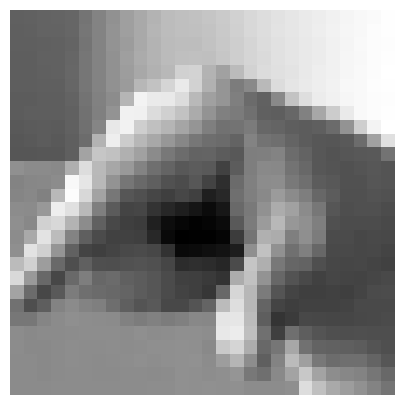

Predicted value is: q
Real value is: q


In [30]:
# A random index is created again, the image is printed, its real value defined in the data set and the value that is predicted with the previously trained model
idx = np.random.randint(len(y_test))
plot_letter(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'Predicted value is: {alphabet[pred]}')
print(f'Real value is: {alphabet[y_test[idx]]}')